In [1]:
library(stringr)
library(ggplot2)
train.data <- read.csv("../data/train.csv", na.strings = c(NA, ""))
train.data$Survived <- factor(train.data$Survived)
train.data$Pclass <- factor(train.data$Pclass)

In [2]:
sapply(train.data, 
       function(df) { 
           sum(is.na(df) == TRUE) / length(df); 
       })

PassengerId    Survived      Pclass        Name         Sex         Age 
0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.198653199 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
0.000000000 0.000000000 0.000000000 0.000000000 0.771043771 0.002244669

In [3]:
# Impute values.
train.data$Embarked[which(is.na(train.data$Embarked))] <- 'S'
table(train.data$Embarked, useNA = "always")


   C    Q    S <NA> 
 168   77  646    0 

In [4]:
train.data$Name <- as.character(train.data$Name)
tbl.names <- table(unlist(strsplit(train.data$Name, "\\s+")))
sort(tbl.names[grep("\\.", names(tbl.names))], decreasing = TRUE)


      Mr.     Miss.      Mrs.   Master.       Dr.      Rev.      Col.    Major. 
      517       182       125        40         7         6         2         2 
    Mlle.     Capt. Countess.      Don. Jonkheer.        L.     Lady.      Mme. 
        2         1         1         1         1         1         1         1 
      Ms.      Sir. 
        1         1 

In [54]:
tbl.age.title <- cbind(train.data$Age, str_match(train.data$Name, "[a-zA-z]+\\."))
table(tbl.age.title[is.na(tbl.age.title[,1]), 2])


    Dr. Master.   Miss.     Mr.    Mrs. 
      1       4      36     119      17 

In [5]:
# Calculate mean age by title.
mean.dr <- mean(train.data$Age[grepl(" Dr\\.", train.data$Name) & !is.na(train.data$Age)])
mean.mr <- mean(train.data$Age[grepl(" Mr\\.", train.data$Name) & !is.na(train.data$Age)])
mean.mrs <- mean(train.data$Age[grepl(" Mrs\\.", train.data$Name) & !is.na(train.data$Age)])
mean.miss <- mean(train.data$Age[grepl(" Miss\\.", train.data$Name) & !is.na(train.data$Age)])
mean.master <- mean(train.data$Age[grepl(" Master\\.", train.data$Name) & !is.na(train.data$Age)])

In [7]:
# Use mean as approximate age, when acutal age is not available. 
train.data$Age[grepl(" Dr\\.", train.data$Name) & is.na(train.data$Age)] <- mean.dr
train.data$Age[grepl(" Mr\\.", train.data$Name) & is.na(train.data$Age)] <- mean.mr 
train.data$Age[grepl(" Mrs\\.", train.data$Name) & is.na(train.data$Age)] <- mean.mrs 
train.data$Age[grepl(" Miss\\.", train.data$Name) & is.na(train.data$Age)] <- mean.miss 
train.data$Age[grepl(" Master\\.", train.data$Name) & is.na(train.data$Age)] <- mean.master

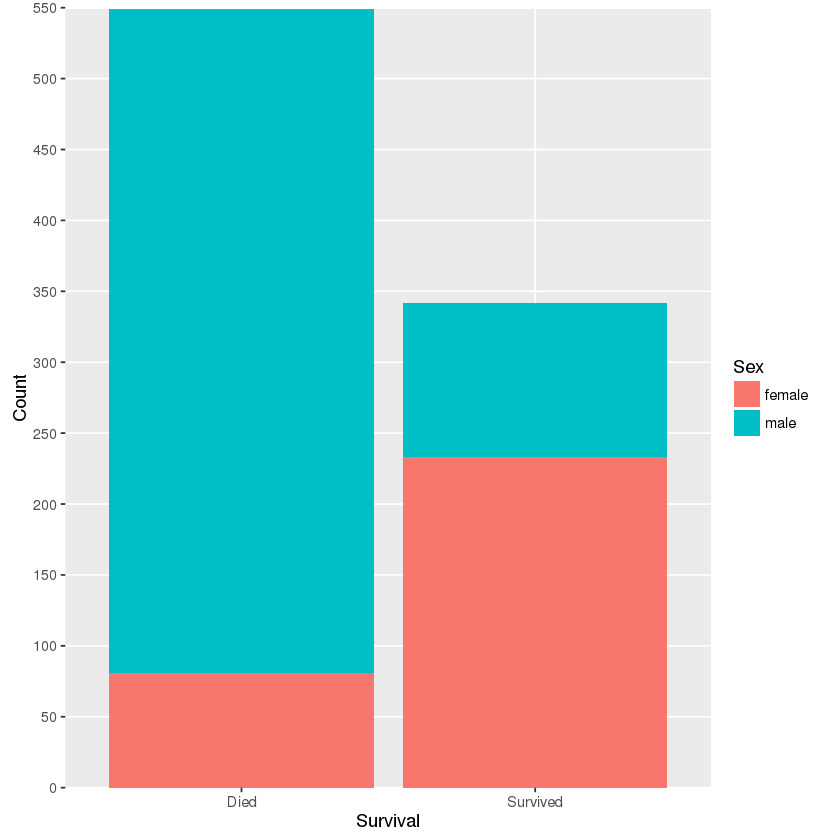

In [26]:
ggplot(data = train.data, aes(x = train.data$Survived, fill = train.data$Sex)) + geom_bar() + scale_fill_discrete(name = "Sex") + scale_x_discrete(name = "Survival", labels = c("0" = "Died", "1" = "Survived")) + scale_y_discrete(name = "Count", limits = seq(0, 550, 50))